# Explanatory graphs

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

from aposteriori import ndfu


GRAPH_DIR = Path("./graphs")
sns.set_theme(style="whitegrid")

In [2]:
def save_plot(path: Path) -> None:
    """
    Saves a plot to the specified filepath.

    :param path: The full path (including filename) where the plot will be saved.
    :type path: pathlib.Path
    """
    path.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(path, bbox_inches="tight")
    print(f"Figure saved to {path.resolve()}")


def truncated_normal(loc, scale, lower=0, upper=10, size=100):
    a, b = (lower - loc) / scale, (upper - loc) / scale
    return scipy.stats.truncnorm(a, b, loc=loc, scale=scale).rvs(size)

## Intuition

In [3]:
colors = sns.color_palette()
bins = 10
d1_mean = 2
d2_mean = 6

In [4]:
INTUITION_SIZE = 50
d1 = truncated_normal(loc=d1_mean, scale=1.3, size=INTUITION_SIZE)
d2 = truncated_normal(loc=d2_mean, scale=1.3, size=INTUITION_SIZE)
d_union = np.hstack([d1, d2])

n_d1 = ndfu(d1, bins=bins)
n_d2 = ndfu(d2, bins=bins)
n_union = ndfu(d_union, bins=bins)
ndfus = [n_d1, n_d2, n_union]

x_values = [d1_mean, d2_mean, (d1_mean + d2_mean) / 2 - 0.7]
y_values = [0.35, 0.35, 0.22]

Figure saved to /home/dimits/Documents/research/aposteriori-unimodality/graphs/ndfu_single_comment.png


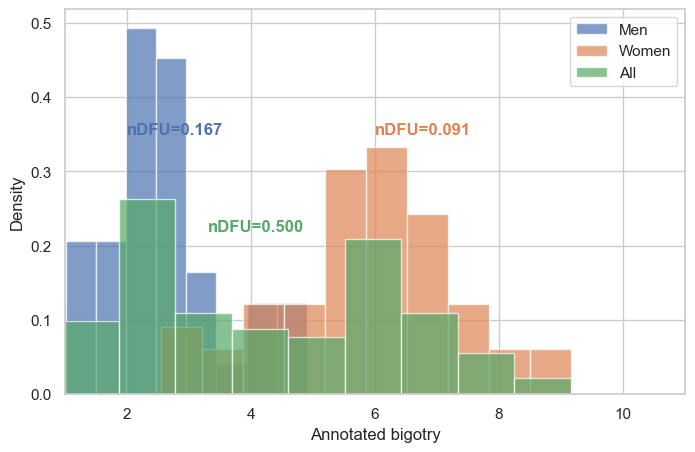

In [5]:
plt.figure(figsize=(8, 5))
plt.hist(
    d1,
    bins=bins,
    density=True,
    alpha=0.7,
    color=colors[0],
    label="Men",
)
plt.hist(
    d2,
    bins=bins,
    density=True,
    alpha=0.7,
    color=colors[1],
    label="Women",
)
plt.hist(
    d_union,
    bins=bins,
    density=True,
    alpha=0.7,
    color=colors[2],
    label="All",
)

# Annotating nDFU values
for pos, val, color, ndfu_value in zip(x_values, y_values, colors, ndfus):
    text = f"nDFU={ndfu_value:.3f}"
    plt.text(pos, val, text, color=color, weight="bold")


plt.xlim(1, 11)
plt.legend()
plt.xlabel("Annotated bigotry")
plt.ylabel("Density")

save_plot(GRAPH_DIR / "ndfu_single_comment.png")
plt.show()

## Why comment-level?

In [6]:
DIFF_COMMENTS_SIZE = 200
d_woman_comment1 = truncated_normal(loc=d2_mean, scale=1.3, size=DIFF_COMMENTS_SIZE)
d_woman_comment2 = truncated_normal(loc=d1_mean, scale=1.3, size=DIFF_COMMENTS_SIZE)

d_man_comment1 = truncated_normal(loc=d1_mean, scale=1.3, size=DIFF_COMMENTS_SIZE)
d_man_comment2 = truncated_normal(loc=d2_mean, scale=1.3, size=DIFF_COMMENTS_SIZE)

d_woman = np.hstack([d_woman_comment1, d_woman_comment2])
d_man = np.hstack([d_man_comment1, d_man_comment2])

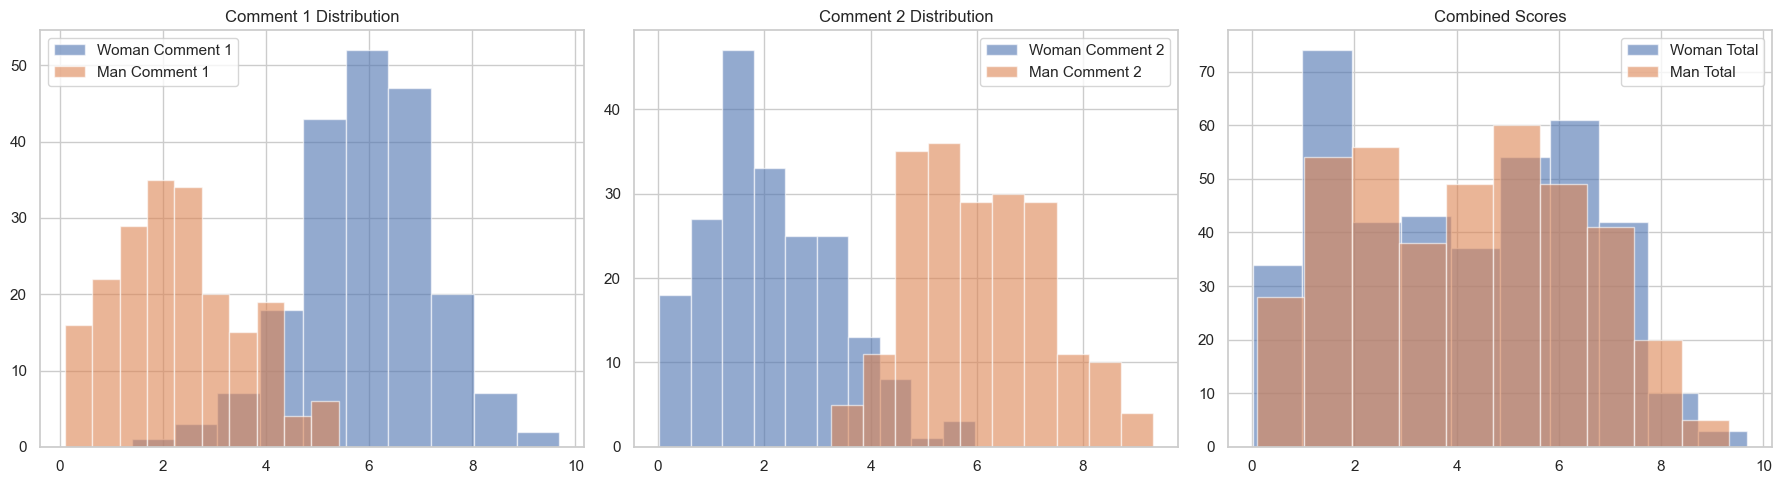

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), tight_layout=True)

# Plot comment1 histograms
axs[0].hist(d_woman_comment1, bins=bins, alpha=0.6, label='Woman Comment 1')
axs[0].hist(d_man_comment1, bins=bins, alpha=0.6, label='Man Comment 1')
axs[0].set_title('Comment 1 Distribution')
axs[0].legend()

# Plot comment2 histograms
axs[1].hist(d_woman_comment2, bins=bins, alpha=0.6, label='Woman Comment 2')
axs[1].hist(d_man_comment2, bins=bins, alpha=0.6, label='Man Comment 2')
axs[1].set_title('Comment 2 Distribution')
axs[1].legend()

# Plot combined scores
axs[2].hist(d_woman, bins=bins, alpha=0.6, label='Woman Total')
axs[2].hist(d_man, bins=bins, alpha=0.6, label='Man Total')
axs[2].set_title('Combined Scores')
axs[2].legend()

plt.show()

In [8]:
n_woman_comment1 = ndfu(d_woman_comment1, bins=bins)
n_woman_comment2 = ndfu(d_woman_comment2, bins=bins)

n_man_comment1 = ndfu(d_man_comment1, bins=bins)
n_man_comment2 = ndfu(d_man_comment2, bins=bins)

n_woman = ndfu(d_woman, bins=bins)
n_man = ndfu(d_man, bins=bins)

print(f"Comment 1\nWomen: {n_woman_comment1}, Men: {n_man_comment1}")
print(f"Comment 2\nWomen: {n_woman_comment2}, Men: {n_man_comment2}")
print(f"Both\nWomen: {n_woman}, Men: {n_man}")

Comment 1
Women: 0.0, Men: 0.11428571428571431
Comment 2
Women: 0.0425531914893617, Men: 0.027777777777777804
Both
Women: 0.2297297297297298, Men: 0.3000000000000001
